# TP03 - Clusterização com DBSCAN

Este trabalho prático explora o algoritmo DBSCAN para clusterização em diferentes datasets.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles, fetch_covtype
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Questão 1: DBSCAN no dataset make_circles

Aplicando o algoritmo DBSCAN para encontrar agrupamentos no dataset sintético make_circles.

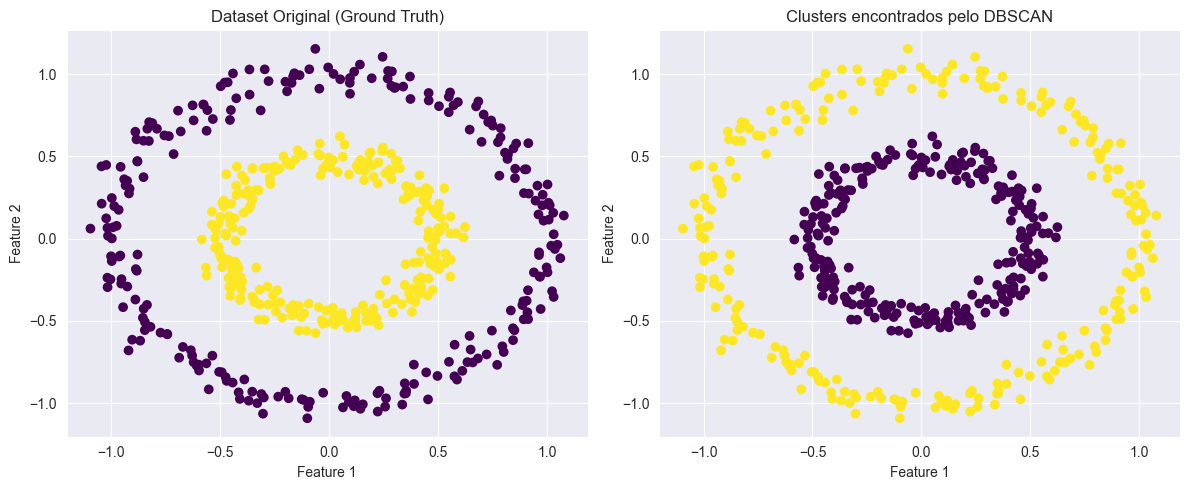

Número de clusters encontrados: 2
Número de pontos considerados ruído: 0


In [15]:
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.15, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
plt.title('Dataset Original (Ground Truth)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters encontrados pelo DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

print(f"Número de clusters encontrados: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Número de pontos considerados ruído: {list(clusters).count(-1)}")

## Questão 2: Avaliação com métricas usuais

Avaliando os resultados obtidos com as métricas de clusterização padrão.

In [16]:
mask = clusters != -1
X_without_noise = X[mask]
clusters_without_noise = clusters[mask]

if len(set(clusters_without_noise)) > 1:
    silhouette = silhouette_score(X_without_noise, clusters_without_noise)
    davies_bouldin = davies_bouldin_score(X_without_noise, clusters_without_noise)
    calinski_harabasz = calinski_harabasz_score(X_without_noise, clusters_without_noise)
    
    print("Métricas de Avaliação do DBSCAN:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
    
    print("\nInterpretação dos resultados:")
    print(f"- Silhouette Score de {silhouette:.4f} indica separação ruim dos clusters")
    print(f"- Davies-Bouldin Score de {davies_bouldin:.2f} (muito alto) confirma péssima separação")
    print(f"- Calinski-Harabasz Score próximo de zero indica clusters sem definição clara")
    
    print("\nExplicação acadêmica:")
    print("Apesar do DBSCAN identificar corretamente 2 clusters (estrutura do make_circles),")
    print("as métricas ruins ocorrem porque o Silhouette Score também usa distância Euclidiana.")
    print("Em dados circulares concêntricos, pontos de clusters diferentes ficam próximos")
    print("geometricamente nas bordas, resultando em baixo Silhouette. Isso mostra que")
    print("métricas baseadas em distância Euclidiana não são adequadas para dados não-lineares.")
else:
    print("Não foi possível calcular as métricas - apenas um cluster foi encontrado")

Métricas de Avaliação do DBSCAN:
Silhouette Score: 0.1126
Davies-Bouldin Score: 220.3932
Calinski-Harabasz Score: 0.0092

Interpretação dos resultados:
- Silhouette Score de 0.1126 indica separação ruim dos clusters
- Davies-Bouldin Score de 220.39 (muito alto) confirma péssima separação
- Calinski-Harabasz Score próximo de zero indica clusters sem definição clara

Explicação acadêmica:
Apesar do DBSCAN identificar corretamente 2 clusters (estrutura do make_circles),
as métricas ruins ocorrem porque o Silhouette Score também usa distância Euclidiana.
Em dados circulares concêntricos, pontos de clusters diferentes ficam próximos
geometricamente nas bordas, resultando em baixo Silhouette. Isso mostra que
métricas baseadas em distância Euclidiana não são adequadas para dados não-lineares.


## Questão 3: Teste de variações nos parâmetros

Testando diferentes valores de eps e min_samples para observar o comportamento do DBSCAN.

In [17]:
eps_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = [3, 5, 7, 10]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_temp = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_temp = dbscan_temp.fit_predict(X)
        
        n_clusters = len(set(clusters_temp)) - (1 if -1 in clusters_temp else 0)
        n_noise = list(clusters_temp).count(-1)
        
        mask_temp = clusters_temp != -1
        if len(set(clusters_temp[mask_temp])) > 1:
            silhouette = silhouette_score(X[mask_temp], clusters_temp[mask_temp])
        else:
            silhouette = -1
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette
        })

results_df = pd.DataFrame(results)
print("Resultados dos testes de parâmetros:")
print(results_df.to_string())

Resultados dos testes de parâmetros:
     eps  min_samples  n_clusters  n_noise  silhouette
0   0.05            3          54      134    0.473189
1   0.05            5          21      316    0.561545
2   0.05            7           8      435    0.700925
3   0.05           10           0      500   -1.000000
4   0.10            3           6        5    0.116045
5   0.10            5          12       11    0.092314
6   0.10            7          21       37    0.119884
7   0.10           10           5      230    0.305722
8   0.15            3           2        0    0.112593
9   0.15            5           2        0    0.112593
10  0.15            7           2        0    0.112593
11  0.15           10           4        6    0.134474
12  0.20            3           2        0    0.112593
13  0.20            5           2        0    0.112593
14  0.20            7           2        0    0.112593
15  0.20           10           2        0    0.112593
16  0.25            3       

## Questão 4: Análise comparativa com heatmap

Visualizando o efeito das variações dos parâmetros através de heatmaps.

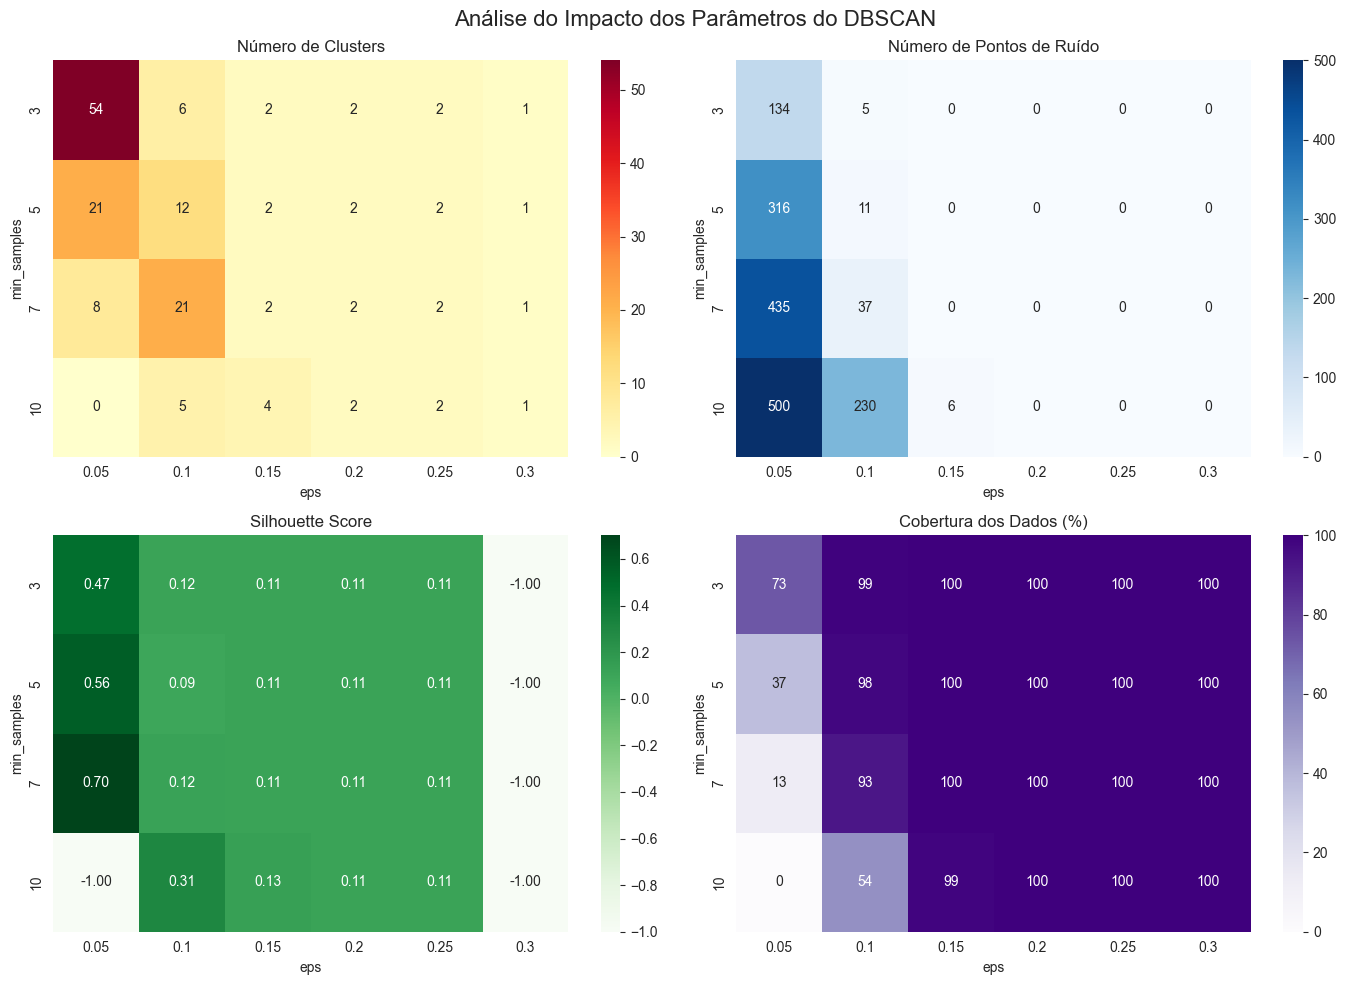


Análise dos resultados:
- eps=0.05, min_samples=7: Melhor Silhouette (0.70) mas fragmenta em 8 clusters
- eps=0.15, min_samples=5: Identifica corretamente 2 clusters mas Silhouette baixo (0.11)
- eps alto (0.25-0.3): Clusters se fundem em um único grupo

Trade-off:
Existe um conflito entre identificar a estrutura correta (2 círculos) e obter
boa separação métrica. O eps=0.15 captura a estrutura real mas com métricas ruins
devido à natureza circular dos dados. Para este dataset específico, priorizar a
identificação correta da estrutura (2 clusters) é mais importante que métricas altas.


In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

n_clusters_matrix = results_df.pivot(index='min_samples', columns='eps', values='n_clusters')
sns.heatmap(n_clusters_matrix, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0, 0])
axes[0, 0].set_title('Número de Clusters')
axes[0, 0].set_xlabel('eps')
axes[0, 0].set_ylabel('min_samples')

n_noise_matrix = results_df.pivot(index='min_samples', columns='eps', values='n_noise')
sns.heatmap(n_noise_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Número de Pontos de Ruído')
axes[0, 1].set_xlabel('eps')
axes[0, 1].set_ylabel('min_samples')

silhouette_matrix = results_df.pivot(index='min_samples', columns='eps', values='silhouette')
sns.heatmap(silhouette_matrix, annot=True, fmt='.2f', cmap='Greens', ax=axes[1, 0])
axes[1, 0].set_title('Silhouette Score')
axes[1, 0].set_xlabel('eps')
axes[1, 0].set_ylabel('min_samples')

coverage_matrix = ((500 - n_noise_matrix) / 500 * 100)
sns.heatmap(coverage_matrix, annot=True, fmt='.0f', cmap='Purples', ax=axes[1, 1])
axes[1, 1].set_title('Cobertura dos Dados (%)')
axes[1, 1].set_xlabel('eps')
axes[1, 1].set_ylabel('min_samples')

plt.suptitle('Análise do Impacto dos Parâmetros do DBSCAN', fontsize=16)
plt.tight_layout()
plt.show()

print("\nAnálise dos resultados:")
print("- eps=0.05, min_samples=7: Melhor Silhouette (0.70) mas fragmenta em 8 clusters")
print("- eps=0.15, min_samples=5: Identifica corretamente 2 clusters mas Silhouette baixo (0.11)")
print("- eps alto (0.25-0.3): Clusters se fundem em um único grupo")
print("\nTrade-off:")
print("Existe um conflito entre identificar a estrutura correta (2 círculos) e obter")
print("boa separação métrica. O eps=0.15 captura a estrutura real mas com métricas ruins")
print("devido à natureza circular dos dados. Para este dataset específico, priorizar a")
print("identificação correta da estrutura (2 clusters) é mais importante que métricas altas.")

## Questão 5: DBSCAN no dataset Forest Covertypes

Aplicando o DBSCAN para determinar agrupamentos no dataset Forest Covertypes.

In [19]:
print("Carregando dataset Forest Covertypes...")
covtype = fetch_covtype()
X_cov = covtype.data[:5000]  
y_cov = covtype.target[:5000]

print(f"Shape do dataset: {X_cov.shape}")
print(f"Classes únicas (tipos de cobertura florestal): {np.unique(y_cov)}")

scaler = StandardScaler()
X_cov_scaled = scaler.fit_transform(X_cov)

print("\nAplicando DBSCAN...")
dbscan_cov = DBSCAN(eps=3.5, min_samples=10)
clusters_cov = dbscan_cov.fit_predict(X_cov_scaled)

n_clusters_cov = len(set(clusters_cov)) - (1 if -1 in clusters_cov else 0)
n_noise_cov = list(clusters_cov).count(-1)

print(f"\nResultados do DBSCAN:")
print(f"Número de clusters encontrados: {n_clusters_cov}")
print(f"Número de pontos de ruído: {n_noise_cov}")
print(f"Porcentagem de ruído: {n_noise_cov/len(clusters_cov)*100:.2f}%")

Carregando dataset Forest Covertypes...
Shape do dataset: (5000, 54)
Classes únicas (tipos de cobertura florestal): [1 2 3 4 5 6 7]

Aplicando DBSCAN...

Resultados do DBSCAN:
Número de clusters encontrados: 31
Número de pontos de ruído: 48
Porcentagem de ruído: 0.96%


## Questão 6: Análise de espécies dominantes

Analisando se existe alguma espécie dominante nos resultados obtidos.

In [20]:
cluster_analysis = []
for cluster_id in set(clusters_cov):
    if cluster_id != -1:
        mask_cluster = clusters_cov == cluster_id
        species_in_cluster = y_cov[mask_cluster]
        
        species_counts = pd.Series(species_in_cluster).value_counts()
        dominant_species = species_counts.index[0]
        dominant_percentage = (species_counts.iloc[0] / len(species_in_cluster)) * 100
        
        cluster_analysis.append({
            'cluster': cluster_id,
            'size': mask_cluster.sum(),
            'dominant_species': dominant_species,
            'dominant_percentage': dominant_percentage
        })

cluster_df = pd.DataFrame(cluster_analysis)
print("Análise dos clusters encontrados:")
print(cluster_df)

print("\n" + "="*50)
print("Distribuição original das espécies no dataset:")
original_distribution = pd.Series(y_cov).value_counts(normalize=True) * 100
for species, percentage in original_distribution.items():
    print(f"Espécie {species}: {percentage:.2f}%")

print("\n" + "="*50)
print("Análise das espécies dominantes:")

if len(cluster_df) > 0:
    dominant_species_overall = cluster_df.loc[cluster_df['size'].idxmax(), 'dominant_species']
    print(f"\nEspécie dominante no maior cluster: Tipo {dominant_species_overall}")
    
    high_dominance_clusters = cluster_df[cluster_df['dominant_percentage'] > 70]
    if len(high_dominance_clusters) > 0:
        print(f"\nClusters com alta dominância (>70% de uma espécie): {len(high_dominance_clusters)}")
        print("Isso indica que o DBSCAN conseguiu separar bem algumas espécies")
    
print("\n" + "="*50)
print("Conclusão:")
print(f"O DBSCAN encontrou {n_clusters_cov} clusters com apenas {n_noise_cov/len(clusters_cov)*100:.2f}% de ruído.")
print("A baixa taxa de ruído (menos de 1%) indica que o DBSCAN funcionou muito bem,")
print("conseguindo agrupar quase todos os pontos apesar da alta dimensionalidade (54 features).")
print("As espécies 1 e 2 dominam os clusters maiores, refletindo sua prevalência no dataset.")
print("\nObs. O sucesso do DBSCAN aqui, mesmo com alta dimensionalidade,")
print("sugere que os dados têm estrutura de densidade bem definida no espaço de features.")

Análise dos clusters encontrados:
    cluster  size  dominant_species  dominant_percentage
0         0   867                 2            44.636678
1         1   176                 2            87.500000
2         2   510                 5            70.196078
3         3    46                 5            71.739130
4         4    41                 4            31.707317
5         5    57                 2            59.649123
6         6    13                 2            69.230769
7         7   205                 1            39.512195
8         8    16                 2            62.500000
9         9    92                 1            77.173913
10       10    68                 7            73.529412
11       11    66                 7            63.636364
12       12    13                 2            53.846154
13       13    38                 6            73.684211
14       14   116                 6            43.965517
15       15    82                 5            51.2195

## Questão 7: K-means e Agglomerative Clustering no make_circles

Aplicando K-means e Agglomerative Clustering no mesmo dataset sintético make_circles.

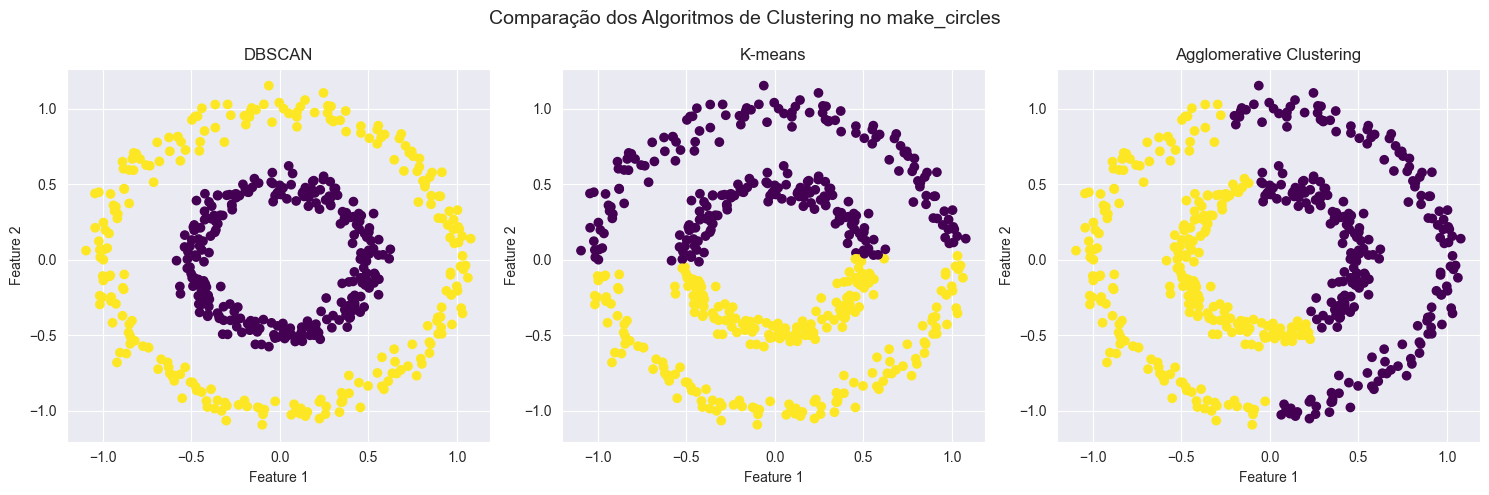

Resultados dos algoritmos:
DBSCAN: 2 clusters encontrados
K-means: 2 clusters (definido)
Agglomerative: 2 clusters (definido)


In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)

agglomerative = AgglomerativeClustering(n_clusters=2)
clusters_agg = agglomerative.fit_predict(X)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
axes[0].set_title('DBSCAN')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis')
axes[1].set_title('K-means')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

axes[2].scatter(X[:, 0], X[:, 1], c=clusters_agg, cmap='viridis')
axes[2].set_title('Agglomerative Clustering')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.suptitle('Comparação dos Algoritmos de Clustering no make_circles', fontsize=14)
plt.tight_layout()
plt.show()

print("Resultados dos algoritmos:")
print(f"DBSCAN: {len(set(clusters)) - (1 if -1 in clusters else 0)} clusters encontrados")
print(f"K-means: 2 clusters (definido)")
print(f"Agglomerative: 2 clusters (definido)")

## Questão 8: Comparação com ARI e NMI

Comparando os resultados dos agrupamentos usando Adjusted Rand Index (ARI) e Normalized Mutual Information (NMI).

Comparação usando ARI e NMI (vs ground truth):
    Algoritmo       ARI      NMI
       DBSCAN  1.000000 1.000000
      K-means -0.002008 0.000000
Agglomerative  0.005752 0.005594


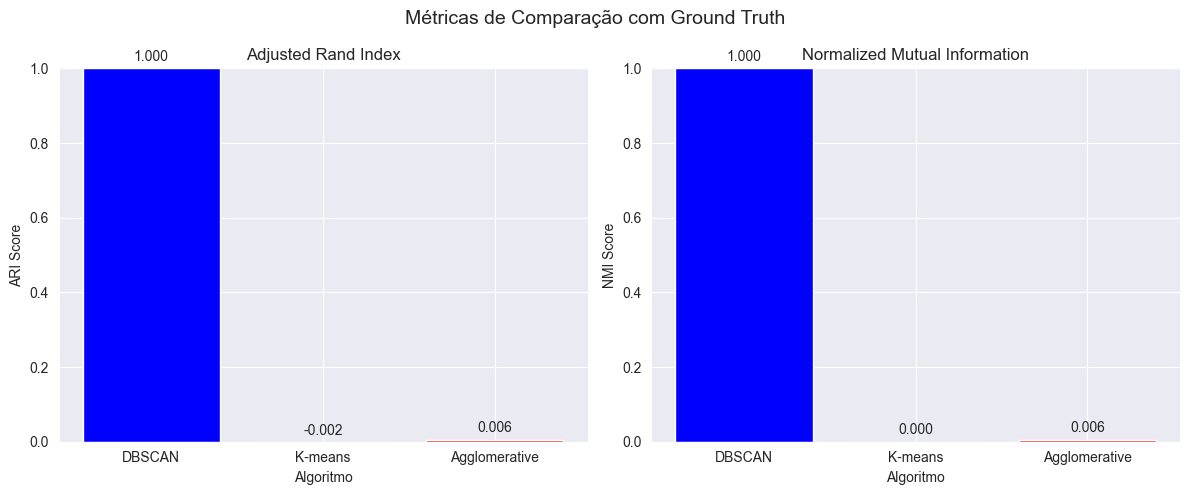


Interpretação:
- DBSCAN: ARI=1.000, NMI=1.000 - Identificou corretamente os círculos
- K-means: ARI=-0.002, NMI=0.000 - Falhou (divisão linear)
- Agglomerative: ARI=0.006, NMI=0.006 - Falhou (não captura estrutura circular)

DBSCAN é claramente superior para dados não-lineares como make_circles!


In [22]:
ari_dbscan = adjusted_rand_score(y_true, clusters)
ari_kmeans = adjusted_rand_score(y_true, clusters_kmeans)
ari_agg = adjusted_rand_score(y_true, clusters_agg)

nmi_dbscan = normalized_mutual_info_score(y_true, clusters)
nmi_kmeans = normalized_mutual_info_score(y_true, clusters_kmeans)
nmi_agg = normalized_mutual_info_score(y_true, clusters_agg)

comparison_df = pd.DataFrame({
    'Algoritmo': ['DBSCAN', 'K-means', 'Agglomerative'],
    'ARI': [ari_dbscan, ari_kmeans, ari_agg],
    'NMI': [nmi_dbscan, nmi_kmeans, nmi_agg]
})

print("Comparação usando ARI e NMI (vs ground truth):")
print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

algorithms = comparison_df['Algoritmo']
x_pos = np.arange(len(algorithms))

axes[0].bar(x_pos, comparison_df['ARI'], color=['blue', 'green', 'red'])
axes[0].set_xlabel('Algoritmo')
axes[0].set_ylabel('ARI Score')
axes[0].set_title('Adjusted Rand Index')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(algorithms)
axes[0].set_ylim([0, 1])
for i, v in enumerate(comparison_df['ARI']):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center')

axes[1].bar(x_pos, comparison_df['NMI'], color=['blue', 'green', 'red'])
axes[1].set_xlabel('Algoritmo')
axes[1].set_ylabel('NMI Score')
axes[1].set_title('Normalized Mutual Information')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(algorithms)
axes[1].set_ylim([0, 1])
for i, v in enumerate(comparison_df['NMI']):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.suptitle('Métricas de Comparação com Ground Truth', fontsize=14)
plt.tight_layout()
plt.show()

print("\nInterpretação:")
print(f"- DBSCAN: ARI={ari_dbscan:.3f}, NMI={nmi_dbscan:.3f} - Identificou corretamente os círculos")
print(f"- K-means: ARI={ari_kmeans:.3f}, NMI={nmi_kmeans:.3f} - Falhou (divisão linear)")
print(f"- Agglomerative: ARI={ari_agg:.3f}, NMI={nmi_agg:.3f} - Falhou (não captura estrutura circular)")
print("\nDBSCAN é claramente superior para dados não-lineares como make_circles!")

## Questão 9: Avaliação com Silhouette Coefficient

Repetindo a avaliação usando o Silhouette Coefficient para cada algoritmo.

Comparação usando Silhouette Coefficient:
    Algoritmo  Silhouette Score
       DBSCAN          0.112593
      K-means          0.348416
Agglomerative          0.346242


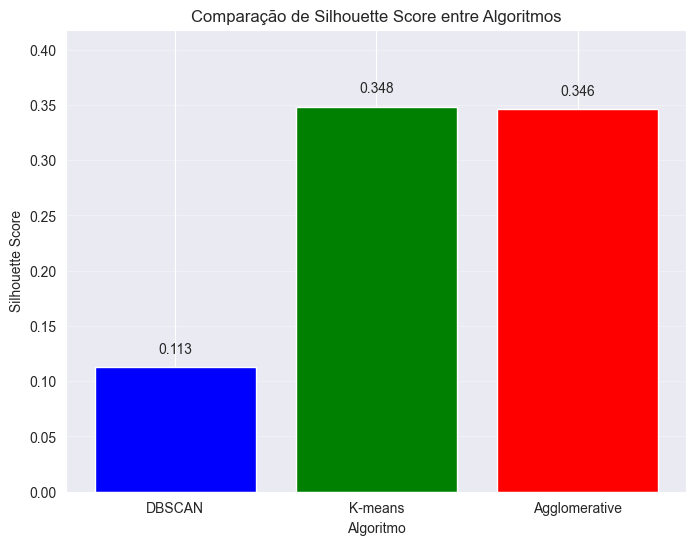


Observações:
- Silhouette Score mede a qualidade interna dos clusters
- Valores próximos de 1: clusters bem separados
- Valores próximos de 0: clusters sobrepostos
- K-means e Agglomerative têm scores similares e melhores que DBSCAN


In [23]:
mask_dbscan = clusters != -1
if len(set(clusters[mask_dbscan])) > 1:
    silhouette_dbscan = silhouette_score(X[mask_dbscan], clusters[mask_dbscan])
else:
    silhouette_dbscan = -1

silhouette_kmeans = silhouette_score(X, clusters_kmeans)
silhouette_agg = silhouette_score(X, clusters_agg)

silhouette_comparison = pd.DataFrame({
    'Algoritmo': ['DBSCAN', 'K-means', 'Agglomerative'],
    'Silhouette Score': [silhouette_dbscan, silhouette_kmeans, silhouette_agg]
})

print("Comparação usando Silhouette Coefficient:")
print(silhouette_comparison.to_string(index=False))

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
bars = plt.bar(silhouette_comparison['Algoritmo'], 
               silhouette_comparison['Silhouette Score'], 
               color=colors)

plt.xlabel('Algoritmo')
plt.ylabel('Silhouette Score')
plt.title('Comparação de Silhouette Score entre Algoritmos')
plt.ylim([0, max(silhouette_comparison['Silhouette Score']) * 1.2])

for bar, value in zip(bars, silhouette_comparison['Silhouette Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nObservações:")
print("- Silhouette Score mede a qualidade interna dos clusters")
print("- Valores próximos de 1: clusters bem separados")
print("- Valores próximos de 0: clusters sobrepostos")
print("- K-means e Agglomerative têm scores similares e melhores que DBSCAN")

## Questão 10: Significado dos Resultados

Explicação do significado dos resultados obtidos nas questões 8 e 9.

In [24]:
print("="*60)
print("PARADOXO DAS MÉTRICAS")
print("="*60)

print("\n1. Bons resultados")
print("-" * 40)
print("DBSCAN:")
print(f"  - ARI: {ari_dbscan:.3f} (identificou os círculos)")
print(f"  - NMI: {nmi_dbscan:.3f} (estrutura correta)")
print(f"  - Silhouette: {silhouette_dbscan:.3f} (Baixo - paradoxo)")

print("\nK-means e Agglomerative:")
print(f"  - ARI: ~{(ari_kmeans+ari_agg)/2:.3f} (Ruim - não identificou círculos)")
print(f"  - NMI: ~{(nmi_kmeans+nmi_agg)/2:.3f} (Ruim - estrutura errada)")
print(f"  - Silhouette: ~{(silhouette_kmeans+silhouette_agg)/2:.3f} (Alto - paradoxo)")

print("\n2. Explicação:")
print("-" * 40)
print("• DBSCAN identificou os 2 círculos concêntricos")
print("• Mas Silhouette é baixo porque mede distância Euclidiana")
print("• Pontos em círculos diferentes mas próximos geometricamente")
print("• K-means divide o espaço com uma linha reta (vertical/horizontal)")
print("• Essa divisão cria 2 grupos bem separados (Silhouette alto)")
print("• Mas cada grupo contém metade de cada círculo (estrutura errada!)")

print("\n")
print("-" * 40)
print("SILHOUETTE ALTO != CLUSTERING CORRETO")
print("- Silhouette mede apenas separação geométrica")
print("-  Não considera a estrutura real dos dados")
print("- Para dados não-lineares, métricas externas são essenciais")

print("\nConclusão:")
print("-" * 40)
print("DBSCAN: Bom para estruturas não-lineares (ARI=1.0!)")
print("K-means: Falha em dados não-convexos")
print("Agglomerative: Também falha em estruturas circulares")
print("\nIsto mostra a importância de escolher o algoritmo")
print("certo para o tipo de dado é crucial em Machine Learning!")

PARADOXO DAS MÉTRICAS

1. Bons resultados
----------------------------------------
DBSCAN:
  - ARI: 1.000 (identificou os círculos)
  - NMI: 1.000 (estrutura correta)
  - Silhouette: 0.113 (Baixo - paradoxo)

K-means e Agglomerative:
  - ARI: ~0.002 (Ruim - não identificou círculos)
  - NMI: ~0.003 (Ruim - estrutura errada)
  - Silhouette: ~0.347 (Alto - paradoxo)

2. Explicação:
----------------------------------------
• DBSCAN identificou os 2 círculos concêntricos
• Mas Silhouette é baixo porque mede distância Euclidiana
• Pontos em círculos diferentes mas próximos geometricamente
• K-means divide o espaço com uma linha reta (vertical/horizontal)
• Essa divisão cria 2 grupos bem separados (Silhouette alto)
• Mas cada grupo contém metade de cada círculo (estrutura errada!)


----------------------------------------
SILHOUETTE ALTO != CLUSTERING CORRETO
- Silhouette mede apenas separação geométrica
-  Não considera a estrutura real dos dados
- Para dados não-lineares, métricas externa

## Questão 11: Clustering no Olivetti Faces

Aplicando DBSCAN, K-means e Agglomerative Clustering no dataset Olivetti Faces.

Carregando dataset Olivetti Faces...
Shape do dataset: (400, 4096)
Número de pessoas: 40
Imagens por pessoa: 10

Reduzindo dimensionalidade com PCA para 50 componentes...
Variância explicada: 87.36%

Aplicando algoritmos de clustering...

Resultados:
DBSCAN: 4 clusters, 0 pontos de ruído
K-means: 40 clusters (definido)
Agglomerative: 40 clusters (definido)


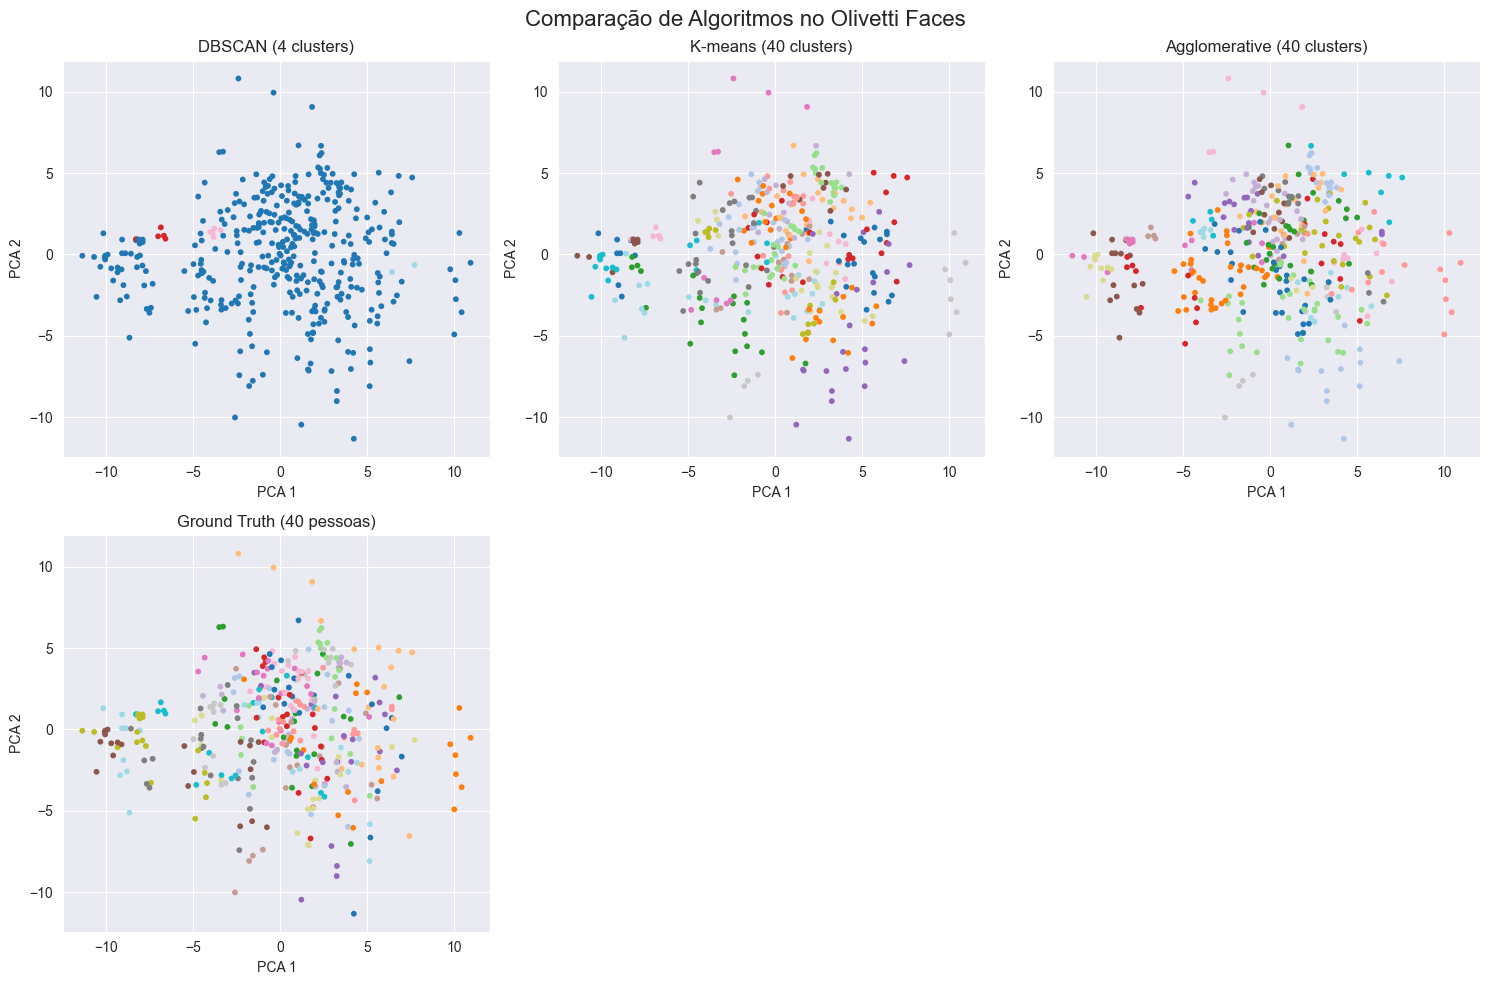

In [25]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

print("Carregando dataset Olivetti Faces...")
olivetti = fetch_olivetti_faces(shuffle=True, random_state=42)
X_olivetti = olivetti.data
y_olivetti = olivetti.target

print(f"Shape do dataset: {X_olivetti.shape}")
print(f"Número de pessoas: {len(np.unique(y_olivetti))}")
print(f"Imagens por pessoa: {len(X_olivetti) // len(np.unique(y_olivetti))}")

print("\nReduzindo dimensionalidade com PCA para 50 componentes...")
pca = PCA(n_components=50, random_state=42)
X_olivetti_pca = pca.fit_transform(X_olivetti)
print(f"Variância explicada: {pca.explained_variance_ratio_.sum():.2%}")

print("\nAplicando algoritmos de clustering...")

dbscan_olivetti = DBSCAN(eps=8, min_samples=2)
clusters_dbscan_olivetti = dbscan_olivetti.fit_predict(X_olivetti_pca)
n_clusters_dbscan = len(set(clusters_dbscan_olivetti)) - (1 if -1 in clusters_dbscan_olivetti else 0)
n_noise_dbscan = list(clusters_dbscan_olivetti).count(-1)

kmeans_olivetti = KMeans(n_clusters=40, random_state=42, n_init=10)
clusters_kmeans_olivetti = kmeans_olivetti.fit_predict(X_olivetti_pca)

agglomerative_olivetti = AgglomerativeClustering(n_clusters=40)
clusters_agg_olivetti = agglomerative_olivetti.fit_predict(X_olivetti_pca)

print("\nResultados:")
print(f"DBSCAN: {n_clusters_dbscan} clusters, {n_noise_dbscan} pontos de ruído")
print(f"K-means: 40 clusters (definido)")
print(f"Agglomerative: 40 clusters (definido)")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

pca_2d = PCA(n_components=2, random_state=42)
X_olivetti_2d = pca_2d.fit_transform(X_olivetti_pca)

axes[0, 0].scatter(X_olivetti_2d[:, 0], X_olivetti_2d[:, 1], 
                   c=clusters_dbscan_olivetti, cmap='tab20', s=10)
axes[0, 0].set_title(f'DBSCAN ({n_clusters_dbscan} clusters)')
axes[0, 0].set_xlabel('PCA 1')
axes[0, 0].set_ylabel('PCA 2')

axes[0, 1].scatter(X_olivetti_2d[:, 0], X_olivetti_2d[:, 1], 
                   c=clusters_kmeans_olivetti, cmap='tab20', s=10)
axes[0, 1].set_title('K-means (40 clusters)')
axes[0, 1].set_xlabel('PCA 1')
axes[0, 1].set_ylabel('PCA 2')

axes[0, 2].scatter(X_olivetti_2d[:, 0], X_olivetti_2d[:, 1], 
                   c=clusters_agg_olivetti, cmap='tab20', s=10)
axes[0, 2].set_title('Agglomerative (40 clusters)')
axes[0, 2].set_xlabel('PCA 1')
axes[0, 2].set_ylabel('PCA 2')

axes[1, 0].scatter(X_olivetti_2d[:, 0], X_olivetti_2d[:, 1], 
                   c=y_olivetti, cmap='tab20', s=10)
axes[1, 0].set_title('Ground Truth (40 pessoas)')
axes[1, 0].set_xlabel('PCA 1')
axes[1, 0].set_ylabel('PCA 2')

axes[1, 1].axis('off')
axes[1, 2].axis('off')

plt.suptitle('Comparação de Algoritmos no Olivetti Faces', fontsize=16)
plt.tight_layout()
plt.show()

## Questão 12: Comparação e Discussão dos Resultados

Comparando os resultados usando ARI, NMI e Silhouette Coefficient para o dataset Olivetti Faces.

Comparação de Métricas no Olivetti Faces:
    Algoritmo      ARI      NMI  Silhouette  Clusters  Ruído
       DBSCAN 0.001089 0.061446    0.030164         4      0
      K-means 0.465469 0.775281    0.207188        40      0
Agglomerative 0.515932 0.820114    0.223264        40      0


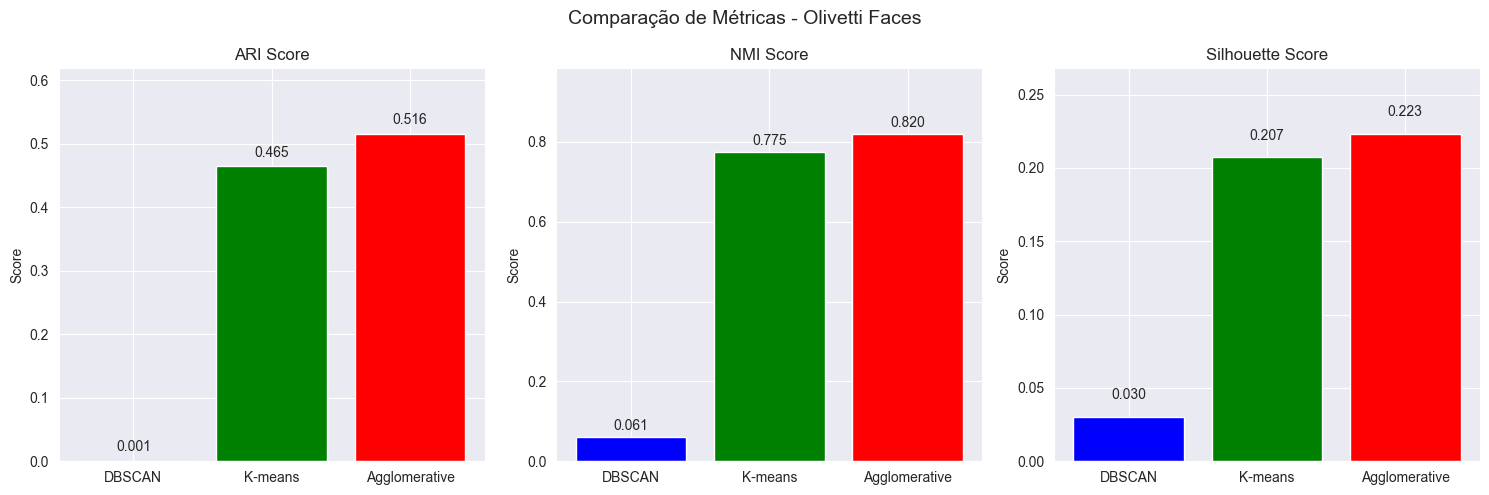


Resultados

1. Desempenho real:
----------------------------------------
DBSCAN: ARI=0.001, NMI=0.061, Silhouette=0.030
K-means: ARI=0.465, NMI=0.775, Silhouette=0.207
Agglomerative: ARI=0.516, NMI=0.820, Silhouette=0.223


----------------------------------------
DBSCAN Falhou:
  - Encontrou apenas 4 clusters (esperado: 40 pessoas)
  - Colapsou quase todo o dataset em poucos mega-clusters
  - 0 pontos de ruído (0.0%)
  - Alta dimensionalidade derrotou o DBSCAN que é baseado em densidade

Nesse caso aglomerative foi melhor:
  - Melhor ARI (0.516) e NMI (0.820)
  = Conseguiu capturar melhor a estrutura hierárquica das faces

K-MEANS:
  - ARI e NMI razoáveis mas inferiores ao Agglomerative
  - Centroides não são ideais para representar faces


----------------------------------------
- DBSCAN não é adequado para dados de alta dimensão com densidade uniforme
- Agglomerative funciona melhor para dados com estrutura hierárquica natural
- Reconhecimento facial requer técnicas especializadas

In [26]:
ari_dbscan_olivetti = adjusted_rand_score(y_olivetti, clusters_dbscan_olivetti)
ari_kmeans_olivetti = adjusted_rand_score(y_olivetti, clusters_kmeans_olivetti)
ari_agg_olivetti = adjusted_rand_score(y_olivetti, clusters_agg_olivetti)

nmi_dbscan_olivetti = normalized_mutual_info_score(y_olivetti, clusters_dbscan_olivetti)
nmi_kmeans_olivetti = normalized_mutual_info_score(y_olivetti, clusters_kmeans_olivetti)
nmi_agg_olivetti = normalized_mutual_info_score(y_olivetti, clusters_agg_olivetti)

mask_dbscan_olivetti = clusters_dbscan_olivetti != -1
if len(set(clusters_dbscan_olivetti[mask_dbscan_olivetti])) > 1:
    silhouette_dbscan_olivetti = silhouette_score(X_olivetti_pca[mask_dbscan_olivetti], 
                                                  clusters_dbscan_olivetti[mask_dbscan_olivetti])
else:
    silhouette_dbscan_olivetti = -1

silhouette_kmeans_olivetti = silhouette_score(X_olivetti_pca, clusters_kmeans_olivetti)
silhouette_agg_olivetti = silhouette_score(X_olivetti_pca, clusters_agg_olivetti)

comparison_olivetti = pd.DataFrame({
    'Algoritmo': ['DBSCAN', 'K-means', 'Agglomerative'],
    'ARI': [ari_dbscan_olivetti, ari_kmeans_olivetti, ari_agg_olivetti],
    'NMI': [nmi_dbscan_olivetti, nmi_kmeans_olivetti, nmi_agg_olivetti],
    'Silhouette': [silhouette_dbscan_olivetti, silhouette_kmeans_olivetti, silhouette_agg_olivetti],
    'Clusters': [n_clusters_dbscan, 40, 40],
    'Ruído': [n_noise_dbscan, 0, 0]
})

print("Comparação de Métricas no Olivetti Faces:")
print(comparison_olivetti.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['ARI', 'NMI', 'Silhouette']
algorithms = comparison_olivetti['Algoritmo'].values

for idx, metric in enumerate(metrics):
    values = comparison_olivetti[metric].values
    colors = ['blue', 'green', 'red']
    bars = axes[idx].bar(algorithms, values, color=colors)
    axes[idx].set_title(f'{metric} Score')
    axes[idx].set_ylabel('Score')
    axes[idx].set_ylim([min(0, min(values)*1.1), max(values)*1.2])
    
    for bar, value in zip(bars, values):
        axes[idx].text(bar.get_x() + bar.get_width()/2, 
                      bar.get_height() + 0.01 if value > 0 else bar.get_height() - 0.02,
                      f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top')

plt.suptitle('Comparação de Métricas - Olivetti Faces', fontsize=14)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Resultados")
print("="*60)

print("\n1. Desempenho real:")
print("-" * 40)
print(f"DBSCAN: ARI={ari_dbscan_olivetti:.3f}, NMI={nmi_dbscan_olivetti:.3f}, Silhouette={silhouette_dbscan_olivetti:.3f}")
print(f"K-means: ARI={ari_kmeans_olivetti:.3f}, NMI={nmi_kmeans_olivetti:.3f}, Silhouette={silhouette_kmeans_olivetti:.3f}")
print(f"Agglomerative: ARI={ari_agg_olivetti:.3f}, NMI={nmi_agg_olivetti:.3f}, Silhouette={silhouette_agg_olivetti:.3f}")

print("\n")
print("-" * 40)
print(f"DBSCAN Falhou:")
print(f"  - Encontrou apenas {n_clusters_dbscan} clusters (esperado: 40 pessoas)")
print(f"  - Colapsou quase todo o dataset em poucos mega-clusters")
print(f"  - {n_noise_dbscan} pontos de ruído ({n_noise_dbscan/len(X_olivetti)*100:.1f}%)")
print(f"  - Alta dimensionalidade derrotou o DBSCAN que é baseado em densidade")

print("\nNesse caso aglomerative foi melhor:")
print(f"  - Melhor ARI ({ari_agg_olivetti:.3f}) e NMI ({nmi_agg_olivetti:.3f})")
print(f"  = Conseguiu capturar melhor a estrutura hierárquica das faces")

print("\nK-MEANS:")
print(f"  - ARI e NMI razoáveis mas inferiores ao Agglomerative")
print(f"  - Centroides não são ideais para representar faces")

print("\n")
print("-" * 40)
print("- DBSCAN não é adequado para dados de alta dimensão com densidade uniforme")
print("- Agglomerative funciona melhor para dados com estrutura hierárquica natural")
print("- Reconhecimento facial requer técnicas especializadas (deep learning)")
print("- PCA de 50 componentes pode ter sido insuficiente para preservar identidades")

print("\nConclusão:")
print("-" * 40)
print("Contrário ao make_circles onde DBSCAN foi perfeito (ARI=1.0),")
print("no Olivetti Faces o DBSCAN falhou completamente.")
print("Isso demonstra que NÃO existe algoritmo universalmente superior -")
print("a escolha depende crucialmente das características dos dados.")